In [5]:
import numpy as np
import matplotlib.pyplot as plt

 

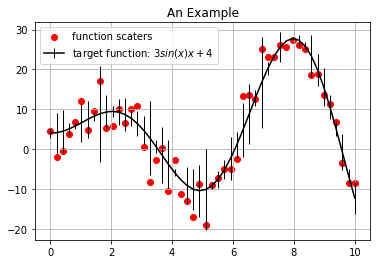

In [11]:
def base1(x, p):
    return x**p

def base2(x, p):
    return np.sin(x)**p

def norm_phi(n, m, phi, w=1):
    sm = 0
    for i in range(1, N):
        sm += w*(phi(x[i], n)*phi(x[i], m) + phi(x[i-1], n)*phi(x[i-1], m)) / 2
        
    return sm

def norm_u(k, phi, u, w=1):
    sm = 0
    for i in range(1, N):
        sm += w*(phi(x[i], k)*u[i] + phi(x[i-1], k)*u[i]) / 2
        
    return sm
    
    
def f(x):
    return 3*np.sin(x)*x**1 + 4
  
    
    
N = 50
a, b = 0, 10
x = np.linspace(a, b, N)
u = f(x) + 4 * np.random.randn(N)
delta = abs(u - f(x) + 2 * np.random.randn(N))

plt.scatter(x, u, label='function scaters', color='r')
plt.errorbar(x, f(x), delta, color='black', label='target function: $3sin(x)x + 4$', elinewidth=1)
plt.grid(1)
plt.legend()
plt.title('An Example')
plt.show()

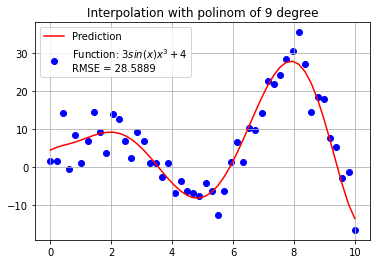

In [10]:
def solver(base, m, u=u, x=x):
    M = m
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i][j] = norm_phi(i, j, base)
    B = np.zeros(M)
    for i in range(M):
        B[i] = norm_u(i, base, u)
    C = np.zeros(M)
    C = np.linalg.solve(A, B)
        
    pred_y = np.array([])
    for n in range(N):
        sm = 0
        for k in range(M):
            sm += C[k]*base(x[n], k)
        pred_y = np.append(pred_y, sm)

    return pred_y

def aprox(base, u=u, x=x):
    M = 0
    MSE = np.sum(delta**2)
    
    Real_MSE = MSE+1
    while Real_MSE > MSE:
        M += 1
        Real_MSE = 0
        y_pred = solver(base, M, u=u, x=x)
        Real_MSE += np.sum((y_pred - u)**2)
        
        if M > 50: break
        
            
    return solver(base, M, u=u, x=x), M, Real_MSE
    
re = aprox(base1)
pred_y = re[0]
fig, ax = plt.subplots(2, 0)
lbl = 'Function: $3sin(x)x^3 + 4$\nRMSE = {0:7.4f}'.format(np.sqrt(re[2]))
plt.scatter(x, u, label=lbl, color='b')
plt.plot(x, pred_y, label='Prediction', color='r')
plt.grid(1)
plt.legend()
plt.title('Interpolation with polinom of {} degreе'.format(re[1]))
plt.show()